## Aufgabe 1 Perzeptron

In [1]:
%matplotlib inline
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Teil 1a:

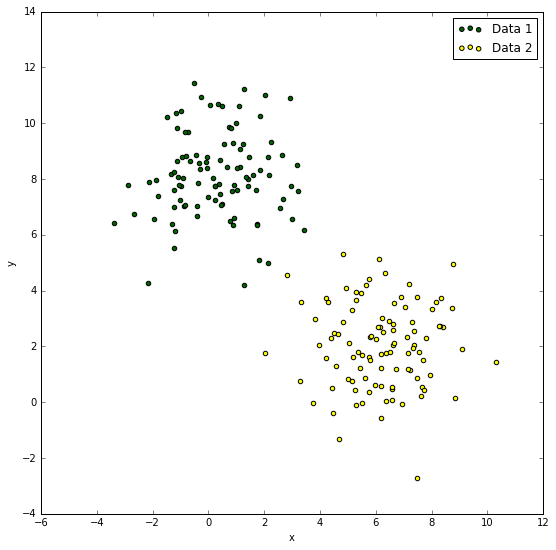

In [2]:
variance = 2
data = 100
pos = [3.2,5] # float problem?!
pos_vec = [-3, 3]
d1, d2, colors = util.create_isotropic_gaussian_twindataset(pos, data, variance, pos_vec)

# plot data with pandas wrapper
pd1 = pd.DataFrame(d1, columns=['x','y'])
pd2 = pd.DataFrame(d2, columns=['x','y'])
ax = pd1.plot(kind='scatter', x='x', y='y', figsize=(9,9), color=colors[0], label='Data 1')
pd2.plot(kind='scatter', x='x', y='y', figsize=(9,9), color=colors[1], label='Data 2', ax=ax)

## Teil 1b:

In [3]:
perceptron = util.Perceptron((d1,d2))

data set length: 200
data point dimension: 2
R: 130.82098495015293


In [4]:
perceptron.learn(max_iterations=530)

correction steps: 57
Last step: b = [-13.0820985], 
	   w = [-6.00003636  5.52957033]
Functional margin min and max: 0.5439046475532088, 72.89855654207508


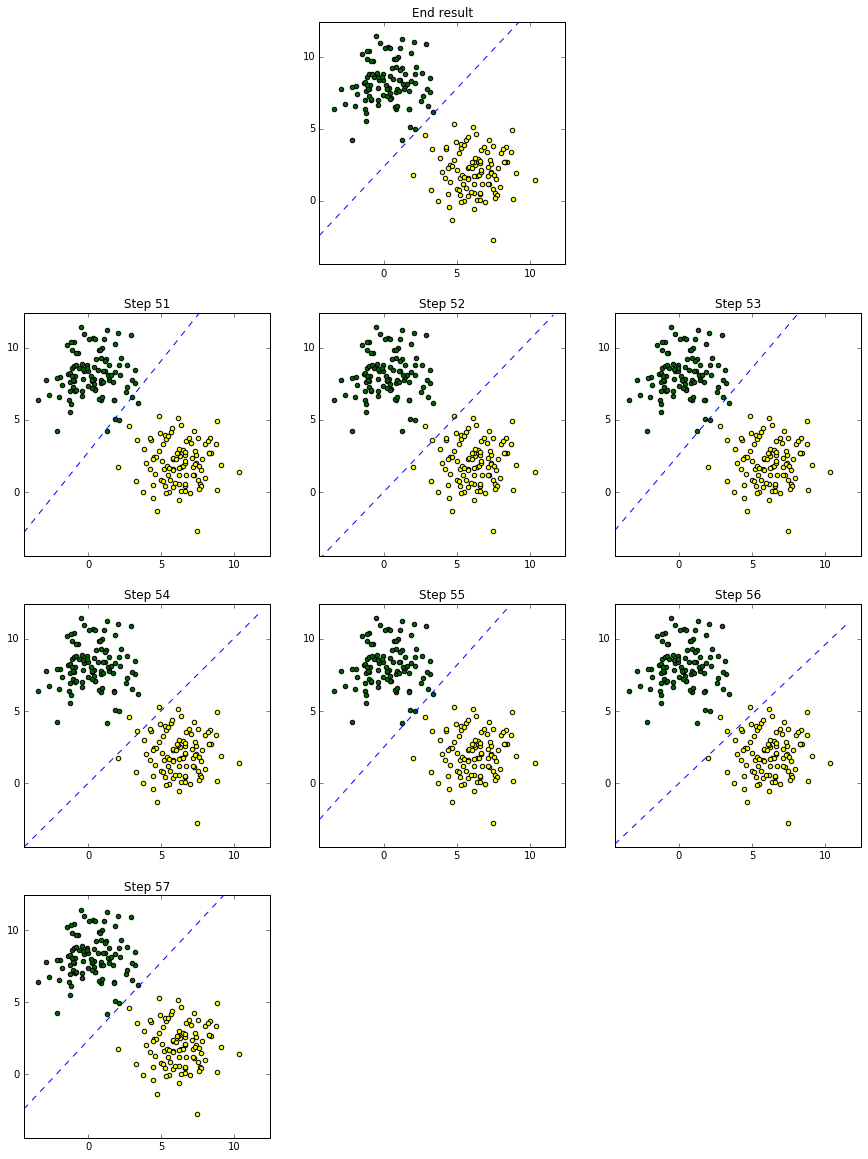

In [5]:
ax = perceptron.plot_result2D(colors, 6)

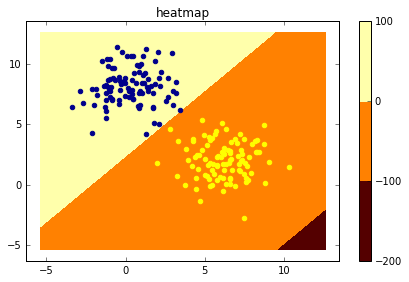

In [6]:
perceptron.plot_discriminant_function()

In [7]:
print("b: {}, w: {}".format(perceptron.b, perceptron.w))

b: [-13.0820985], w: [-6.00003636  5.52957033]


## Teil 1C:

In [8]:
train_data = []
test_data = []
test_names = []
train_names = []
total_amount = 0
for root, files in util.get_person_images('../lfw_funneled/', 'jpg', 70):
    name, data, amount = util.get_dataset(root, files, 2, 3.2)
    test_amount = int(np.ceil(amount*0.4))
    train_amount = int(np.floor(amount*0.6))
    index = np.arange(0, amount, dtype=np.int)
    total_amount = total_amount + amount
    # shuffle index to select random images
    np.random.shuffle(index)
    # save name vector
    test_names.extend([name]*test_amount)
    train_names.extend([name]*train_amount)
    train_data.append(np.asmatrix([data[index] for index in index[test_amount:]]))
    test_data.append(np.asmatrix([data[index] for index in index[:test_amount]]))
    print("{} hat {} Trainings Bilder und {} Test Bilder".format(name, train_amount, test_amount))

Colin_Powell hat 141 Trainings Bilder und 95 Test Bilder
George_W_Bush hat 318 Trainings Bilder und 212 Test Bilder
Hugo_Chavez hat 42 Trainings Bilder und 29 Test Bilder
Ariel_Sharon hat 46 Trainings Bilder und 31 Test Bilder
Tony_Blair hat 86 Trainings Bilder und 58 Test Bilder
Gerhard_Schroeder hat 65 Trainings Bilder und 44 Test Bilder
Donald_Rumsfeld hat 72 Trainings Bilder und 49 Test Bilder


In [9]:
train_design_matrix = np.asmatrix(np.concatenate(train_data))
test_design_matrix = np.asmatrix(np.concatenate(test_data))

In [23]:
print("Insgesamt gibt es {} Trainings Bilder und {} Test Bilder".format(train_design_matrix.shape, test_design_matrix.shape))

Insgesamt gibt es (770, 2209) Trainings Bilder und (518, 2209) Test Bilder


In [11]:
# align test and training data
train_mean = np.mean(train_design_matrix, axis=1)
test_mean = np.mean(test_design_matrix, axis=1)
train_aligned = train_design_matrix - train_mean
test_aligned = test_design_matrix - test_mean

In [12]:
u, d, v = np.linalg.svd(train_aligned, full_matrices=False)
u.shape, d.shape, v.shape

((770, 770), (770,), (770, 2209))

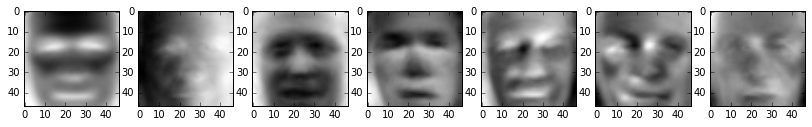

In [13]:
# Plot the first 12 eigenfaces
fig = plt.figure()    
fig, ax = plt.subplots(figsize=(14, 14))
for i, eigenface in enumerate(v[:7], start=1):
    plt.subplot(1, 7, i)
    dim = np.sqrt(eigenface.shape[1])
    plt.imshow(np.reshape(eigenface, (dim, dim)), cmap=plt.gray())

Projektion der der Test und der Trainingsdaten auf die ersten 7 Eigengesichter

In [14]:
features = 7
train_projected = np.dot(v[:features], train_aligned.T).T
test_projected = np.dot(v[:features], test_aligned.T).T

In [15]:
print("Shape Projiziert: train {}, test {}".format(np.shape(train_projected), np.shape(test_projected)))

Shape Projiziert: train (770, 7), test (518, 7)


Bilder werden nun in Gerorge Bush und in nicht George Bush getrennt

In [16]:
person = 'George_W_Bush'
#person = 'Ariel_Sharon'

train_mask_george = np.asmatrix(train_names) == person
test_mask_george = np.asmatrix(test_names) == person

In [17]:
train_george = np.compress(train_mask_george[0,:], train_projected, axis=0)
train_not_george = np.compress((~train_mask_george)[0,:], train_projected, axis=0)
train_labels = np.asarray([-1 if b else 1 for b in train_mask_george[0,:]])

test_george = np.compress(test_mask_george[0,:], test_projected, axis=0)
test_not_george = np.compress(~test_mask_george[0,:], test_projected, axis=0)
test_labels = np.asarray([-1 if b else 1 for b in test_mask_george[0,:]])

In [18]:
print("Im Trainingsdatensatz sind {} Bilder von George Bush und {} Bilder nicht von George Bush".format(train_george.shape[0], train_not_george.shape[0]))

Im Trainingsdatensatz sind 318 Bilder von George Bush und 452 Bilder nicht von George Bush


In [19]:
george_perceptron = util.Perceptron((train_george, train_not_george))

data set length: 770
data point dimension: 7
R: 123.74982048619916


In [20]:
george_perceptron.learn(100)

Did not find linear seperation after 77770 steps
correction steps: 624
Last step: b = [ 0.], 
	   w = [ 0.39503846 -0.07339722 -2.35233756 -0.08655532 -3.95218026  1.93005353
  1.39177424]
Functional margin min and max: -12.323085278050904, 40.121205589422935


In [21]:
george_perceptron.classify(test_projected,test_labels)

False negative (Miss): 219 --> 42.28%
False positive (Fehlalarmrate): 113 --> 21.81%
True negative (korrekte Rückweisung): 99 --> 19.11%
True positive (Detektionswahrscheinlichkeit): 87 --> 16.80%


In [22]:
print("b: {}, w: {}".format(george_perceptron.b, george_perceptron.w))

b: [ 0.], w: [ 0.39503846 -0.07339722 -2.35233756 -0.08655532 -3.95218026  1.93005353
  1.39177424]
